In [211]:
# This is a simple example of how one can access data in the SCEDC s3://scedc-pds dataset using
# file system commands if they use s3fs or another FUSE interface.
# It is based on this web tutorial: https://www.geophysique.be/2013/09/25/seismicity-rate-using-obspy-and-pandas/
# This notebook assumes you have mounted s3://scedc-pds to mount point scedc-pds and mount point is current directory
# s3fs GitHub repo: https://github.com/s3fs-fuse/s3fs-fuse
#
cd scedc-pds/earthquake_catalogs/SCEC_DC/  #only needs to be run once

SyntaxError: invalid syntax (<ipython-input-211-9ede34837fa6>, line 3)

In [212]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import time
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [318]:
years = np.arange(2000,2021)  # range of years to look for in catalog
format = "%Y/%m/%d %H:%M:%S.%f"

In [311]:
df0 = pd.DataFrame()

In [312]:
bins = np.arange(-1,8)
labels = np.array(["[%i:%i["%(i,i+1) for i in bins])

In [313]:
for i in years:
    catalog_file=str(i)+'.catalog'
    df = pd.read_csv(catalog_file,sep="\s+", comment='#',names = ['Ydate', 'time', 'etype','gtype','mag', 'magtype','lat','lon','depth','quality','evid','nph','nwfs'])
    df['dtime'] = df['Ydate'] + ' ' + df['time']
    df['Magnitude_Range'] = pd.cut(df['mag'], bins=bins, labels=False)
    df['dtime2'] = [dt.datetime.strptime(di, format) for di in df.dtime]
    df['Year'] = [dt.datetime.strftime(di, '%Y') for di in df.dtime2]
    df0=df0.append(df)
    

In [314]:
rate = pd.crosstab(df0.Year, df0.Magnitude_Range)

In [315]:
rate

Magnitude_Range,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Year,,,,,,,,
2000,329,2587,14825,2431,187,16,0,0
2001,24,2609,12642,2650,173,15,2,0
2002,9,2598,7411,1671,151,16,1,0
2003,10,2253,7794,1291,173,24,0,1
2004,4,4401,6625,1052,156,17,3,0
2005,3,4437,7313,1259,164,27,2,0
2006,3,3924,5916,1180,158,13,1,0
2007,6,4058,6257,1027,121,15,0,0
2008,0,4784,7256,1769,222,22,5,0


In [316]:
colors = [cm.hsv(float(i+1)/(len(bins)-1)) for i in bins]

<AxesSubplot:xlabel='Year'>

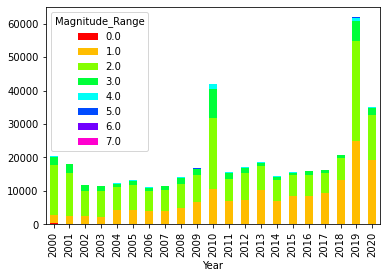

In [317]:
rate.plot(kind='bar',stacked=True,color=colors)